In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
p = []
ppath = '../txtfiles-5/'
p.append(pd.read_csv(ppath + 'p10.txt', sep=' ', header=0))
p.append(pd.read_csv(ppath + 'p20.txt', sep=' ', header=0))
p.append(pd.read_csv(ppath + 'p40.txt', sep=' ', header=0))
cases=len(p)
q = pd.read_csv('../txtfiles-6/plot_ene/p10_e.txt', sep=' ', header=0)

cols = ['m', 'ms', 'e', 'sp_h']

Plaquette of L = 10, 20, 40


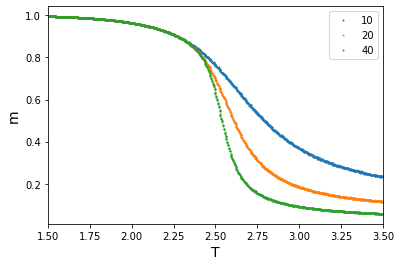

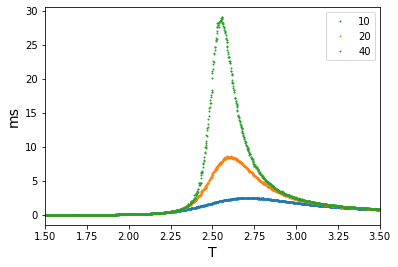

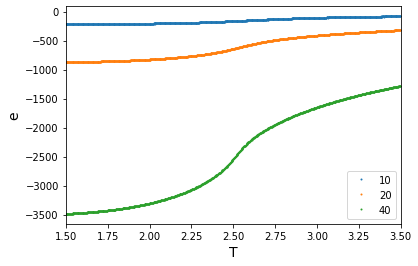

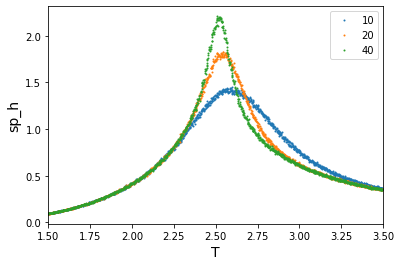

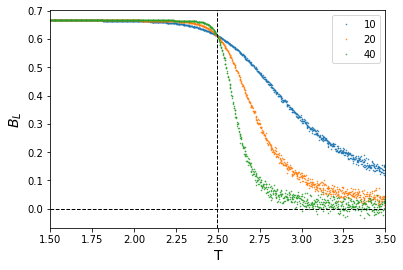

In [11]:
print("Plaquette of L = 10, 20, 40")
for j in range (4):
    for i in range (cases):
        plt.plot(p[i].temperature, p[i][cols[j]], 'o', markersize=1, label=2**i*10)
    plt.xlabel('T', fontsize=14)
    plt.ylabel(cols[j], fontsize=14)
    plt.xlim(1.5, 3.5)
    plt.legend()
    plt.show()

T_c = 2.493
for i in range (cases):
    plt.plot(p[i].temperature, 1-p[i].m4/(3*p[i].m2**2), '.', markersize=1, label=2**i*10)
plt.axhline(y=0, color='k', linewidth=1, linestyle='--')
plt.axvline(x=T_c, color='k', linewidth=1, linestyle='--')
plt.xlim(1.5, 3.5)
plt.xlabel('T', fontsize=14)
plt.ylabel('$B_L$', fontsize=14)
plt.legend()
plt.show()

# I. plot All

Plaquette & Fitted of L=10


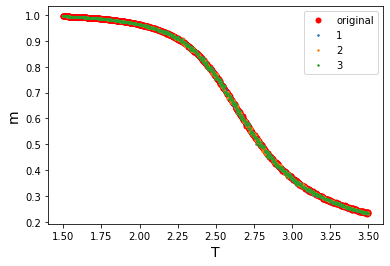

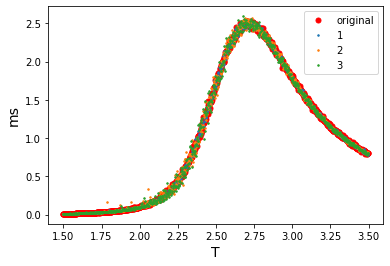

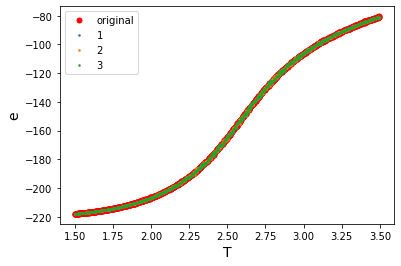

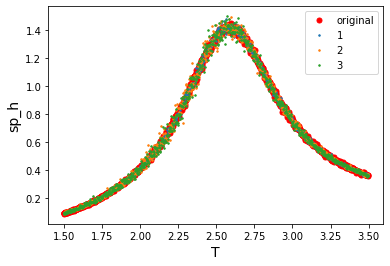

In [9]:
fit_path = '../txtfiles-6/plot_A/plot_' + 'eff'
fit = []
fit.append(pd.read_csv(fit_path + '_1_1.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_2_1.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_1.txt', sep = ' ', header = 1))
for j in range (4):
    plt.plot(p[0].temperature, p[0][cols[j]], 'r.', markersize = 10, markerfacecolor = None, linestyle = 'None', label = 'original')
    for i in range (len(fit)):
        plt.plot(fit[i].temperature[fit[i].temperature>=1.5], fit[i][cols[j]][fit[i].temperature>=1.5], '.', markersize = 3, label = i+1)
    plt.xlabel('T', fontsize=14)
    plt.ylabel(cols[j], fontsize=14)
    plt.legend()
    plt.show()

# II. plot Energy

In [12]:
fit = []
target = 'srch' # met, eff, srch
fit_path = '../txtfiles-6/plot_ene/' + target
fit.append(pd.read_csv(fit_path + '_1_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_4096.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_4096.txt', sep = ' ', header = 1))

for i in range (3):
    for j in range (2):
        R2 = 1 - np.sum((np.array(fit[2*i+j].e) - np.array(q.e))**2) / np.sum((fit[2*i+j].e - np.average(fit[2*i+j].e))**2)
        plt.plot(fit[2*i+j].e, q.e, '.', markersize = 3, label = R2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(target, fontsize=12)
    plt.ylabel('original', fontsize=12)
    plt.legend()
    plt.show()

    for j in range (2):
        plt.plot((np.array(fit[2*i+j].e) - np.array(q.e))**2, '.', markersize = 3)
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()

FileNotFoundError: [Errno 2] File ../txtfiles-6/plot_ene/srch_1_1024.txt does not exist: '../txtfiles-6/plot_ene/srch_1_1024.txt'